In [139]:
from rbibm.plots.main_plots import plot_adversarial_posterior_predictive, plot_adversarial_posterior
from rbibm.utils.utils_data import load_posterior_samples_by_id, get_model_by_id, get_adversarial_examples_by_id, query, get_model_by_idx, query_main, remove_entry_by_id
from rbibm.plots.metric_plots import plot_rob_tolerance_plot, plot_expected_coverage
from rbibm.plots.multi_plots import multi_plot

from rbibm.plots.styles import use_style
from rbibm.tasks import HHTask
import torch

import matplotlib.pyplot as plt

In [140]:
name = "vae"

In [141]:
color_map_eps = {0.: "#252525", 0.1: "#feb24c", 0.2:"#fd8d3c", 0.3: "#fc4e2a", 0.5:"#e31a1c", 1.: "#bd0026", 2.:"#800026" }
color_map_N_train = {1000.: "#78c679", 10000.: "#238443", 100000.: "#004529"}
color_map_attack = {"L2PGDAttack": "#023858", "L2UniformNoiseAttack": "#a6bddb"}

In [142]:
df = query_main(name)

In [143]:
df

,id,task,loss,defense,model_name,N_train,N_val,N_test,train_loss,validation_loss,test_loss,train_time,sim_time,seed
0,712cc005-668f-49ec-a899-66a03c1320d1,vae_task,NLLLoss,FIMTraceRegularizer,gaussian,100000,512,10000,-6.228877,-5.803266,-6.388892,62.873884,2.979670,0
1,a7dcc727-125e-4c42-a29c-8fe5ded84f74,vae_task,NLLLoss,FIMTraceRegularizer,gaussian,100000,512,10000,-4.921508,-4.582995,-5.118801,67.762754,5.484173,0
2,592a1d18-054c-4a66-843b-ee7c9a3e6d97,vae_task,NLLLoss,FIMTraceRegularizer,gaussian,100000,512,10000,-2.119665,-1.782670,-2.381810,78.887038,5.478194,0
3,da44ac8e-a5f9-49d5-9974-74375d652a79,vae_task,NLLLoss,FIMTraceRegularizer,gaussian,100000,512,10000,-6.624331,-5.907475,-6.443060,70.527943,3.106035,0
4,9d609ab7-404b-4c44-b826-da64f324f707,vae_task,NLLLoss,FIMTraceRegularizer,gaussian,100000,512,10000,-1.970116,-1.917925,-2.214687,85.969785,NaN,0
5,412d2894-eac6-44bf-882f-5179d5faf1a3,vae_task,NLLLoss,FIMTraceRegularizer,gaussian,100000,512,10000,-6.836256,-5.788411,-6.415062,112.134001,NaN,0
6,ee0bdfec-2378-4125-aece-34f47e359517,vae_task,NLLLoss,FIMTraceRegularizer,gaussian,100000,512,10000,-6.417338,-6.038549,-6.341456,112.944032,NaN,0
7,f54776ee-5a14-4807-80d1-d651c5d4c969,vae_task,NLLLoss,FIMTraceRegularizer,gaussian,100000,512,10000,-4.877487,-4.612696,-5.367034,108.156637,NaN,0
8,0e6f05be-6d13-48be-a9c5-bea35cf22ecc,vae_task,NLLLoss,FIMLargestEigenvalueRegularizer,gaussian,100000,512,10000,-3.205322,-3.060001,-3.384469,15067.573561,3.844091,0
9,60c88a24-87f5-4f13-a404-22f8ce06573d,vae_task,NLLLoss,FIMLargestEigenvalueRegularizer,gaussian,100000,512,10000,-6.759890,-5.921771,-6.324519,19900.872686,3.089160,0


In [144]:
color_map_defenses0 = {"FIMTraceRegularizer": "#8856a7"}
color_map_defenses1 = {"FIMTraceRegularizer": "#e6a6ed", "FIMLargestEigenvalueRegularizer": "#410466"}

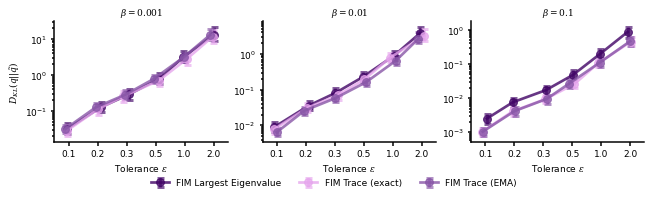

In [173]:
with use_style("pyloric"):
    fig, axes = plt.subplots(1, 3, figsize=(9,2.5))


    _, ax = plot_rob_tolerance_plot(name, hue="defense", params_defense_algorithm="jac_exact", params_defense_beta=0.001, ax=axes[0], jitter=True, alpha=0.8, color_map=color_map_defenses1)
    ax.legend_ = None
    _, ax = plot_rob_tolerance_plot(name, hue="defense", params_defense_algorithm="ema",  ax=axes[0], params_defense_beta=0.001, jitter=True, alpha=0.8, color_map=color_map_defenses0)
    ax.legend_ = None
    ax.set_ylabel(None)

    _, ax = plot_rob_tolerance_plot(name, hue="defense", params_defense_algorithm="jac_exact", params_defense_beta=0.01, ax=axes[1], jitter=True, alpha=0.8, color_map=color_map_defenses1)
    ax.legend_ = None
    _, ax = plot_rob_tolerance_plot(name, hue="defense", params_defense_algorithm="ema",  ax=axes[1], params_defense_beta=0.01, jitter=True, alpha=0.8, color_map=color_map_defenses0)
    ax.legend_ = None
    ax.set_ylabel(None)
    _, ax = plot_rob_tolerance_plot(name, hue="defense", params_defense_algorithm="jac_exact", params_defense_beta=0.1, ax=axes[2], jitter=True, alpha=0.8, color_map=color_map_defenses1)
    ax.legend_ = None
    _, ax = plot_rob_tolerance_plot(name, hue="defense", params_defense_algorithm="ema", ax=axes[2], params_defense_beta=0.1, jitter=True, alpha=0.8, color_map=color_map_defenses0)
    ax.legend_ = None
    ax.set_ylabel(None)

    axes[0].set_ylabel(r"$D_{KL}(q||\tilde{q})$")
    axes[0].set_title(r"$\beta=0.001$")
    axes[1].set_title(r"$\beta=0.01$")
    axes[2].set_title(r"$\beta=0.1$")
    fig.legend(["FIM Largest Eigenvalue", "FIM Trace (exact)", "FIM Trace (EMA)"], ncol=3, bbox_to_anchor=[0.8, 0.05])
    fig.tight_layout()
    fig.savefig("appendix_rob_fim_approx")

Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['60c88a24-87f5-4f13-a404-22f8ce06573d']
Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['9b426437-ffc0-438e-8b2f-34185601a82a']
Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['0e6f05be-6d13-48be-a9c5-bea35cf22ecc']
Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['ee0bdfec-2378-4125-aece-34f47e359517']
Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['f54776ee-5a14-4807-80d1-d651c5d4c969']
Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['9d609ab7-404b-4c44-b826-da64f324f707']
Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['712cc005-668f-49ec-a899-66a03c1320d1']

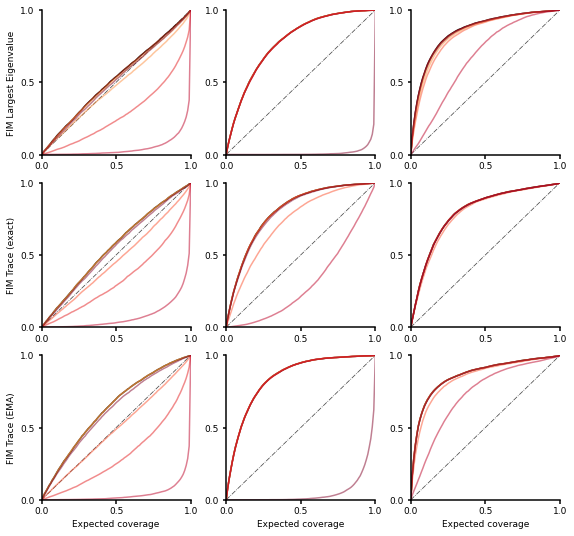

In [172]:
with use_style("pyloric"):
    fig, axes = plt.subplots(3, 3, figsize=(8,7.5))
    i = 0
    for beta in [0.001, 0.01, 0.1]:
        ax = axes[0, i]
        _, ax = plot_expected_coverage(name, defense="FIMLargestEigenvalueRegularizer", hue="eps",with_eps=True, params_defense_beta=beta, color_map=color_map_eps, with_grid=False, ax=ax)
        ax.legend_ = None
        i += 1
        ax.set_xlabel(None)
        if i > 1:
            ax.set_ylabel(None)
        else:
            ax.set_ylabel("FIM Largest Eigenvalue")

    i = 0
    for beta in [0.001, 0.01, 0.1]:
        ax = axes[1, i]
        _, ax = plot_expected_coverage(name, defense="FIMTraceRegularizer", hue="eps",with_eps=True,params_defense_algorithm="jac_exact", params_defense_beta=beta, color_map=color_map_eps, with_grid=False, ax=ax)
        ax.legend_ = None
        i += 1
        ax.set_xlabel(None)
        if i > 1:
            ax.set_ylabel(None)
        else:
            ax.set_ylabel("FIM Trace (exact)")


    i = 0
    for beta in [0.001, 0.01, 0.1]:
        ax = axes[2, i]
        _, ax = plot_expected_coverage(name, defense="FIMTraceRegularizer", hue="eps",with_eps=True,params_defense_algorithm="ema", params_defense_beta=beta, color_map=color_map_eps, with_grid=False, ax=ax)
        ax.legend_ = None
        i += 1
        if i > 1:
            ax.set_ylabel(None)
        else:
            ax.set_ylabel("FIM Trace (EMA)")

    fig.tight_layout()
    fig.savefig("appendix_expected_coverage_fim_approx")

Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['60c88a24-87f5-4f13-a404-22f8ce06573d']


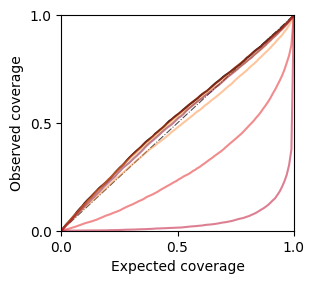

In [76]:
fig, ax = plot_expected_coverage(name, defense="FIMLargestEigenvalueRegularizer", hue="eps",with_eps=True, params_defense_beta=0.001, color_map=color_map_eps, with_grid=False)
ax.legend_ = None

Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['ee0bdfec-2378-4125-aece-34f47e359517']


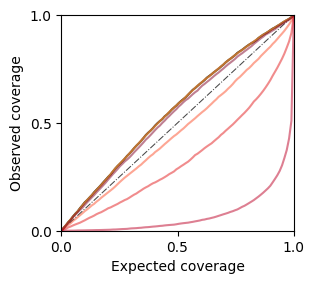

In [77]:
fig, ax = plot_expected_coverage(name, defense="FIMTraceRegularizer", hue="eps",with_eps=True, params_defense_beta=0.001,params_defense_algorithm="jac_exact", color_map=color_map_eps, with_grid=False)
ax.legend_ = None

Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['9b426437-ffc0-438e-8b2f-34185601a82a']


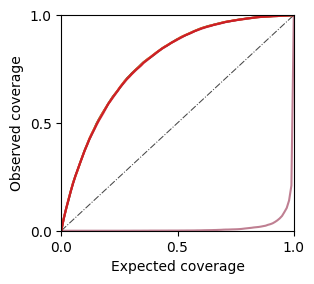

In [95]:
fig, ax = plot_expected_coverage(name, defense="FIMLargestEigenvalueRegularizer", hue="eps",with_eps=True, params_defense_beta=0.01, color_map=color_map_eps, with_grid=False)
ax.legend_ = None

Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['f54776ee-5a14-4807-80d1-d651c5d4c969']


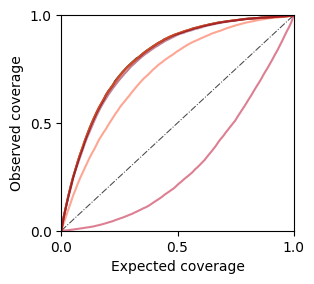

In [94]:
fig, ax = plot_expected_coverage(name, defense="FIMTraceRegularizer", hue="eps",with_eps=True, params_defense_beta=0.01,params_defense_algorithm="jac_exact", color_map=color_map_eps, with_grid=False)
ax.legend_ = None

In [27]:
?plot_expected_coverage

Signature:
plot_expected_coverage(
    name: str,
    task: Optional[str] = None,
    model_name: Optional[str] = None,
    defense: Optional[str] = None,
    loss: Optional[str] = None,
    hue: Optional[str] = None,
    with_eps: bool = True,
    verbose: bool = True,
    color_map=None,
    with_grid=True,
    ax=None,
    **kwargs,
)
Docstring: <no docstring>
File:      /mnt/qb/home/macke/mgloeckler90/rbibm/rbibm/plots/metric_plots.py
Type:      function
